In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('whitegrid')
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_sample_df = pd.read_csv('digit-recognizer/sample_submission.csv')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='label', ylabel='count'>

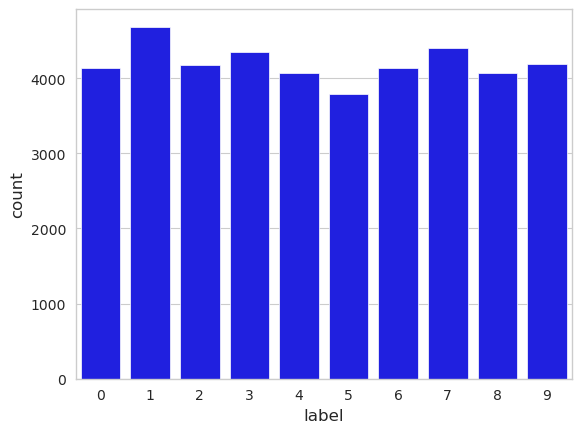

In [6]:
# We have equal categories in train set
sns.countplot(x=train_df['label'], color='b')

In [7]:
X_train = train_df.drop(columns='label')
y_train = train_df['label']
X_test = test_df

In [8]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (42000, 784)
y_train shape: (42000,)
X_test shape: (28000, 784)


In [9]:
# Normalization
X_train /= 255.0
X_test /= 255.0

In [10]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [11]:
# Onehot Encoding
y_train = keras.utils.to_categorical(y_train)

In [12]:
# Split the data to training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

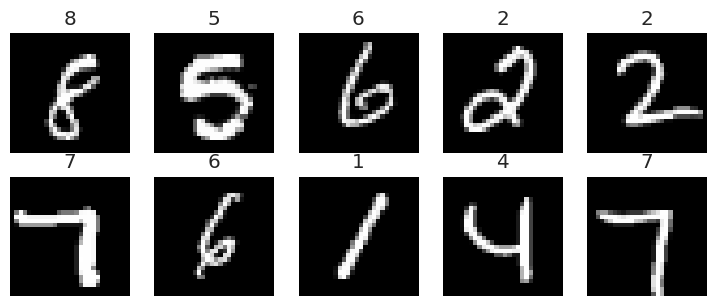

In [13]:
# Plot some examples
plt.figure(figsize=(9,9))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

In [14]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

model = keras.Sequential(
[
    Conv2D(32, (5,5), padding='Same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
]
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 256)               1605888   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [16]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Data Augmantation
datagen = ImageDataGenerator(
        rotation_range=5,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

In [18]:
# Fit the model
batch_size = 128
history = model.fit(datagen.flow(X_train,y_train),
                              batch_size = batch_size,
                              epochs = 30,
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = (X_val,y_val),
                             )

Epoch 1/30
295/295 [==============================] - 7s 23ms/step - loss: 0.6690 - accuracy: 0.7909 - val_loss: 0.1806 - val_accuracy: 0.9471
Epoch 2/30
295/295 [==============================] - 7s 22ms/step - loss: 0.2396 - accuracy: 0.9319 - val_loss: 0.1405 - val_accuracy: 0.9533
Epoch 3/30
295/295 [==============================] - 7s 22ms/step - loss: 0.1928 - accuracy: 0.9389 - val_loss: 0.1019 - val_accuracy: 0.9681
Epoch 4/30
295/295 [==============================] - 7s 23ms/step - loss: 0.1522 - accuracy: 0.9518 - val_loss: 0.1003 - val_accuracy: 0.9688
Epoch 5/30
295/295 [==============================] - 7s 22ms/step - loss: 0.1309 - accuracy: 0.9600 - val_loss: 0.0795 - val_accuracy: 0.9760
Epoch 6/30
295/295 [==============================] - 7s 22ms/step - loss: 0.1337 - accuracy: 0.9595 - val_loss: 0.0760 - val_accuracy: 0.9740
Epoch 7/30
295/295 [==============================] - 6s 22ms/step - loss: 0.1070 - accuracy: 0.9662 - val_loss: 0.0678 - val_accuracy: 0.9793

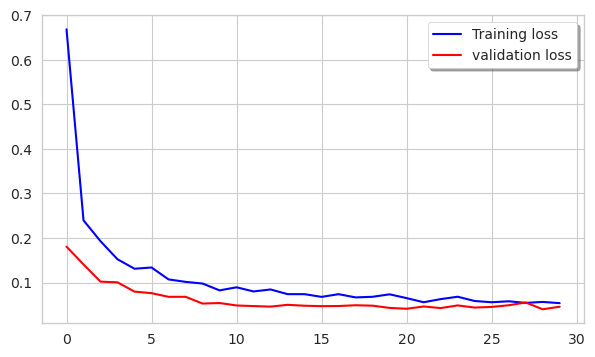

In [19]:
# Plot the loss for training and validation sets
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.legend(loc='best', shadow=True)
plt.show()

In [20]:
preds = model.predict(X_val)

132/132 [==============================] - 1s 7ms/step


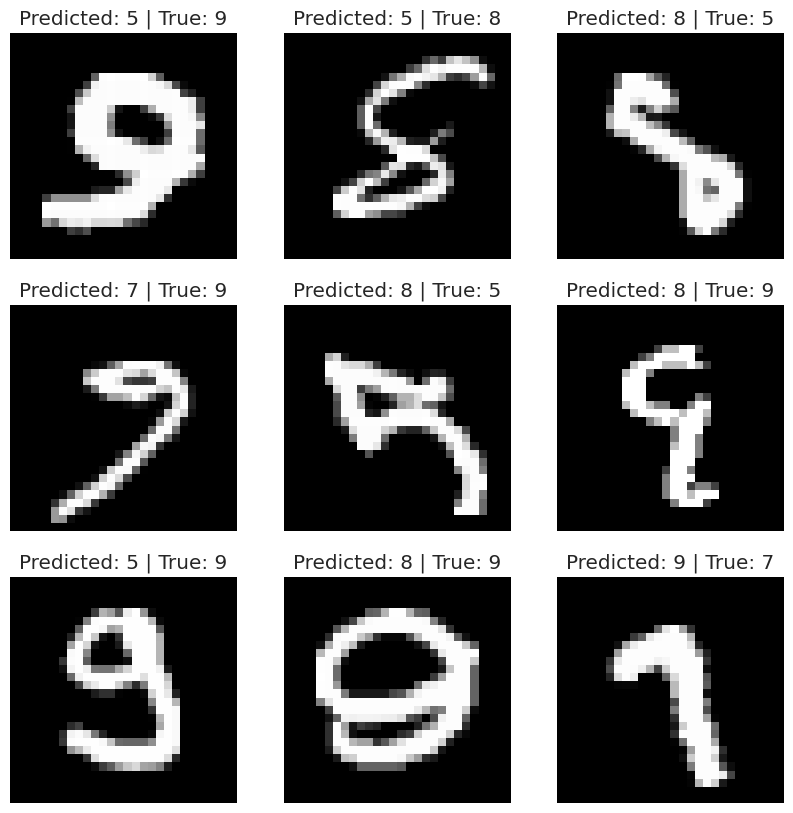

In [21]:
# Plot 9 of the False Results from validation set
# get the labels
preds_labels = np.argmax(preds,axis = 1)
y_val_labels = np.argmax(y_val,axis = 1)

errors = (preds_labels - y_val_labels != 0)
preds_errors = preds_labels[errors]
preds_true = y_val_labels[errors]
X_val_true = X_val[errors]

# make the plot
i = 0
fig, axes = plt.subplots(3,3,figsize=(10,10), sharex=True, sharey=True)
for row in range(3):
    for col in range(3):
        axes[row,col].imshow((X_val_true[i]), cmap='gray')
        axes[row,col].set_title(f'Predicted: {preds_errors[i]} | True: {preds_true[i]}')
        axes[row,col].axis('off')
        i += 1
plt.show()

In [22]:
submission_sample_df.head(10)

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [23]:
my_results = model.predict(X_test)
my_results = np.argmax(my_results, axis=1)
labels = pd.Series(my_results, name='Label')
imageIds = pd.Series(range(1,28001), name='ImageId')

875/875 [==============================] - 6s 7ms/step


In [24]:
my_submission = pd.concat([imageIds, labels], axis=1)
my_submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [25]:
# Finaly, Submit my submission
my_submission.to_csv("digit_recognition_neural_network.csv",index=False)